# Heart Failure Prediction Assignment

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [2]:
df=pd.read_csv("heart failure - heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

---

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only


### 1. Data Exploration (EDA)
- Task 1: Load the dataset using pandas and display the first few rows.
- Task 2: Check for missing values and clean the data if necessary.
- Task 3: Generate summary statistics for the numerical columns.
- Task 4: Visualize the distribution of the target variable (DEATH_EVENT).
- Task 5: Plot histograms or box plots for continuous variables like age, creatinine_phosphokinase, ejection_fraction, serum_creatinine, etc.

#### Handle missing values

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# sns.pairplot(df.isnull())

In [7]:
# Summary statistics for numerical columns
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


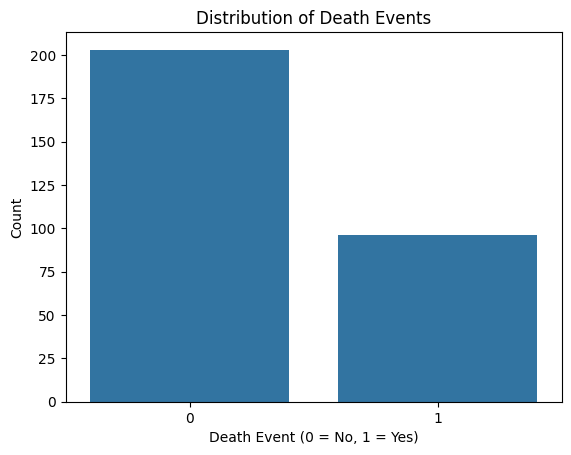

In [8]:
# Countplot for DEATH_EVENT
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of Death Events')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

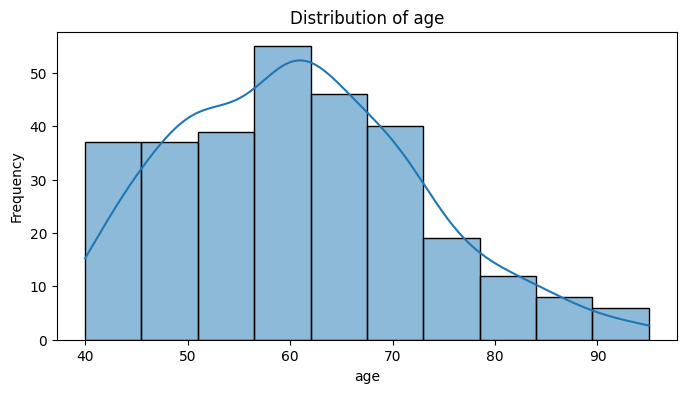

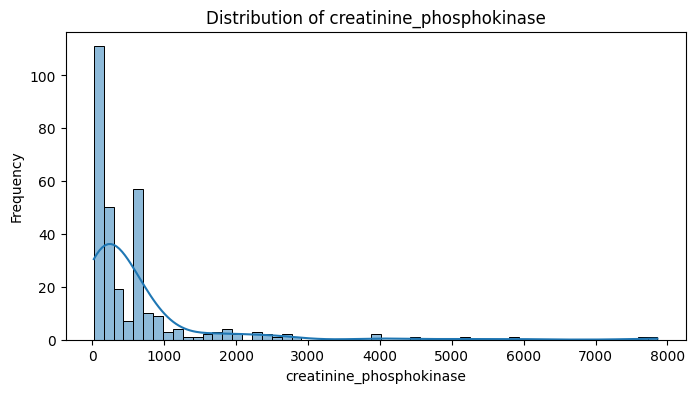

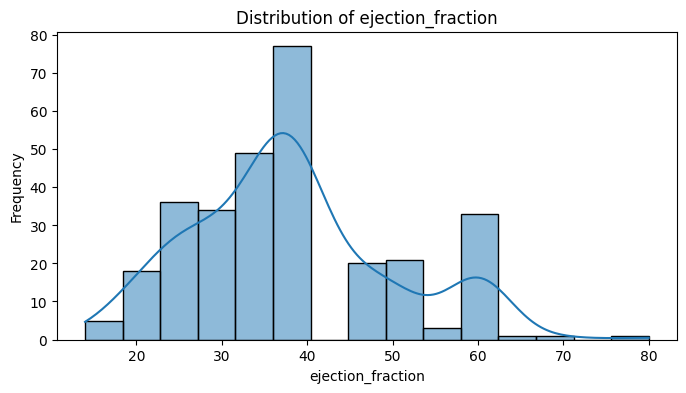

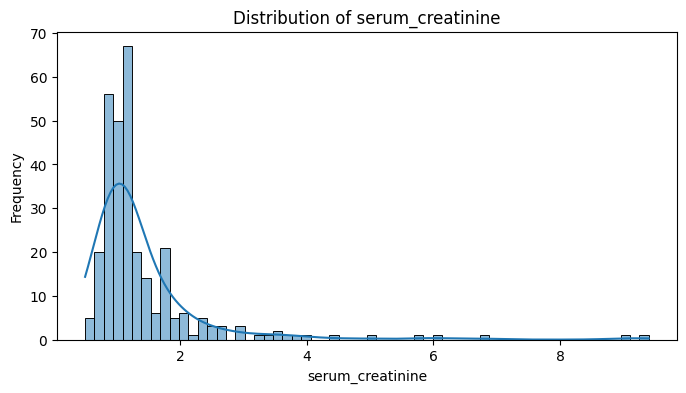

In [9]:
# List of continuous variables to visualize
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine']

# plots Histograms
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

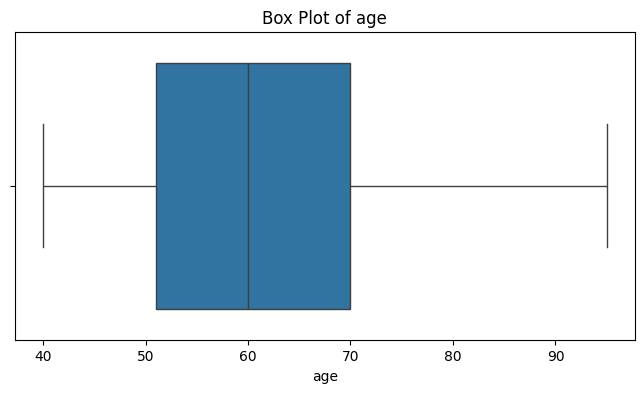

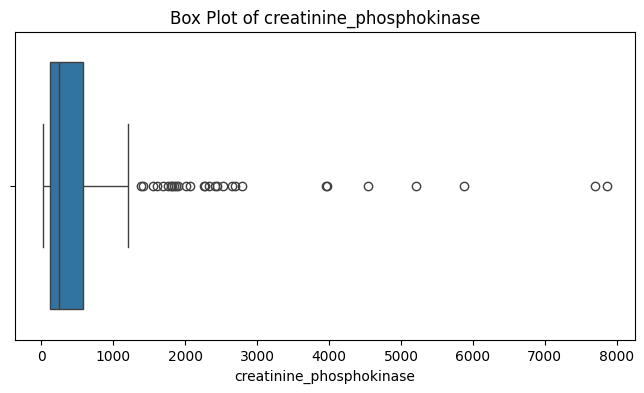

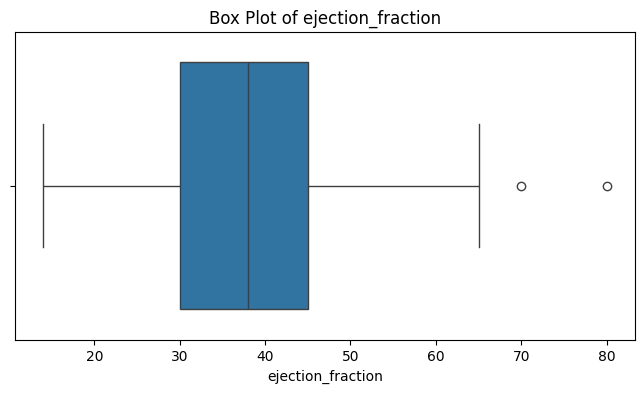

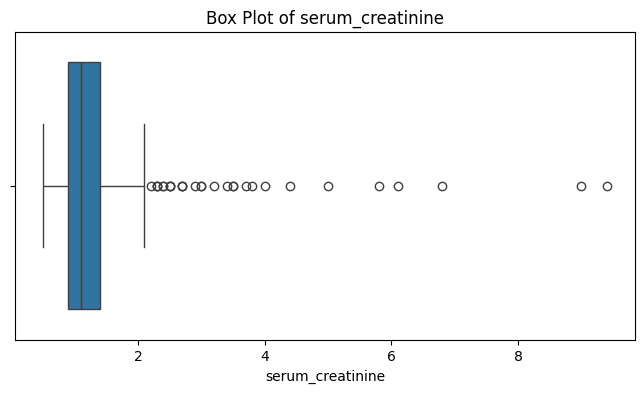

In [10]:
# Box plots
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

# 2. Data Visualization
- Task 6: Create a correlation matrix heatmap to understand the relationships between the features.
- Task 7: Create count plots or bar charts for categorical variables like anaemia, diabetes, high_blood_pressure, sex, and smoking.
- Task 8: Create scatter plots or pair plots for continuous variables like age vs ejection_fraction, serum_creatinine, etc., colored by DEATH_EVENT.

In [11]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


[cmap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

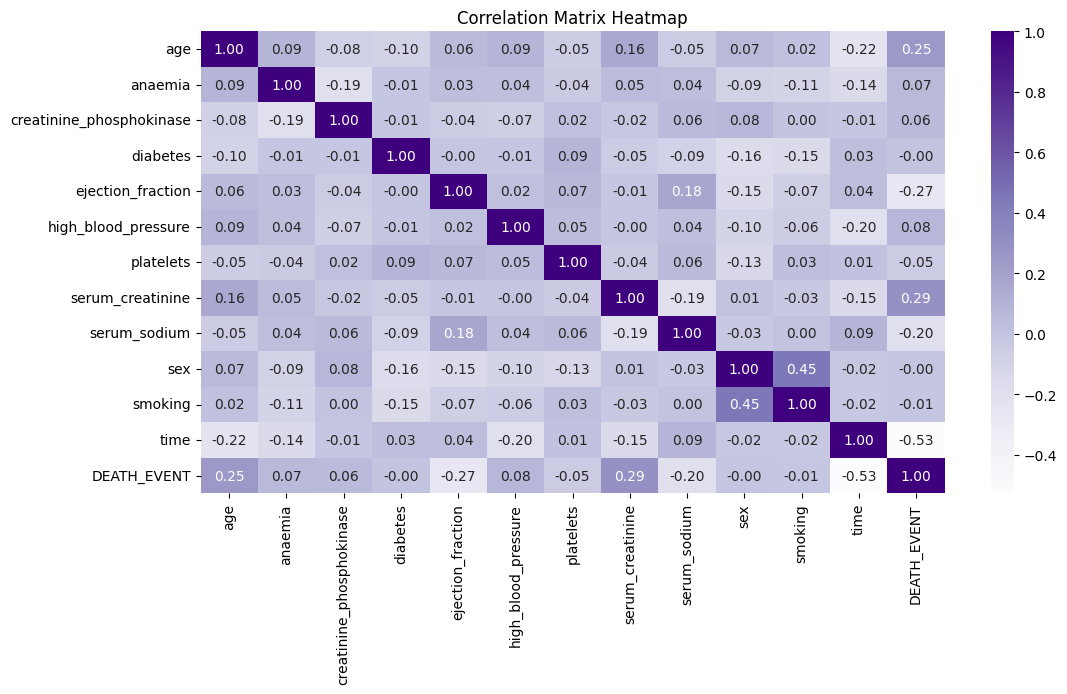

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True,  cmap='Purples', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Task 7: Create count plots or bar charts for categorical variables like anaemia, diabetes, high_blood_pressure, sex, and smoking.

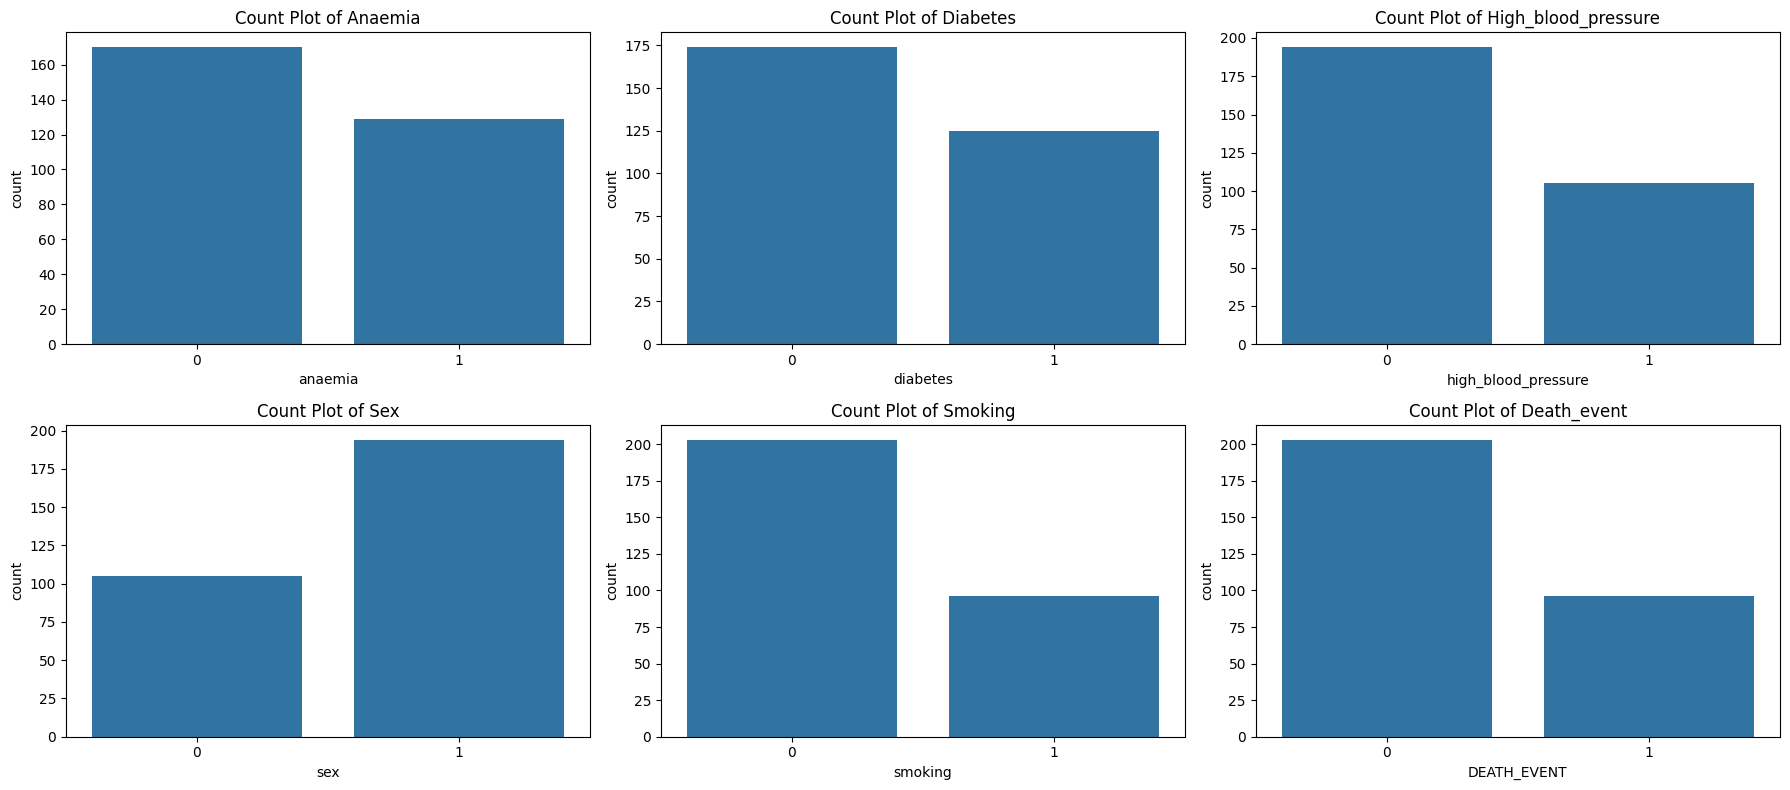

In [13]:
category_col = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Use enumerate to get the index and the column name
for i, var in enumerate(category_col):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=var, ax=axes[row, col])
    axes[row, col].set_title(f"Count Plot of {var.capitalize()}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Task 8: Create scatter plots or pair plots for continuous variables like age vs ejection_fraction, serum_creatinine, etc., colored by DEATH_EVENT.

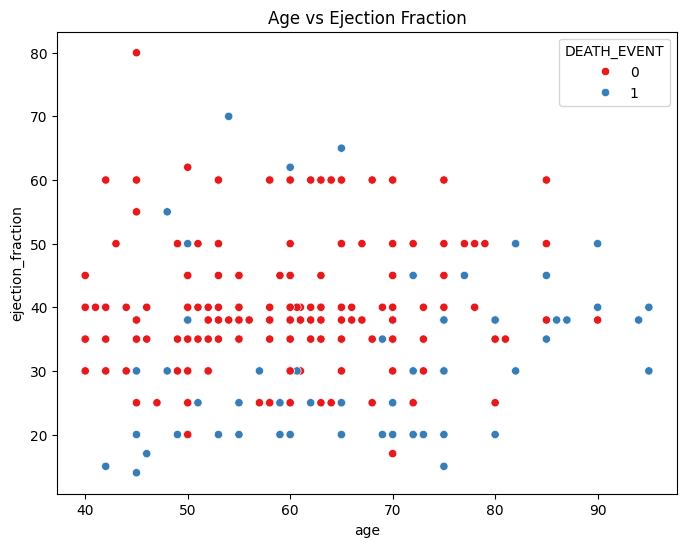

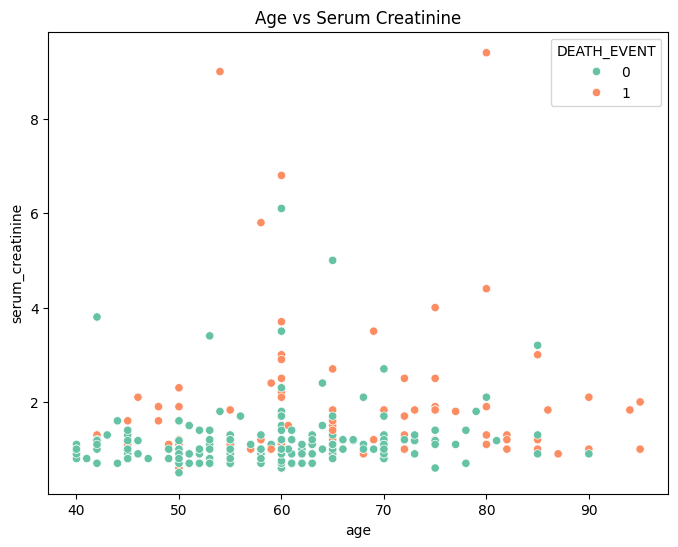

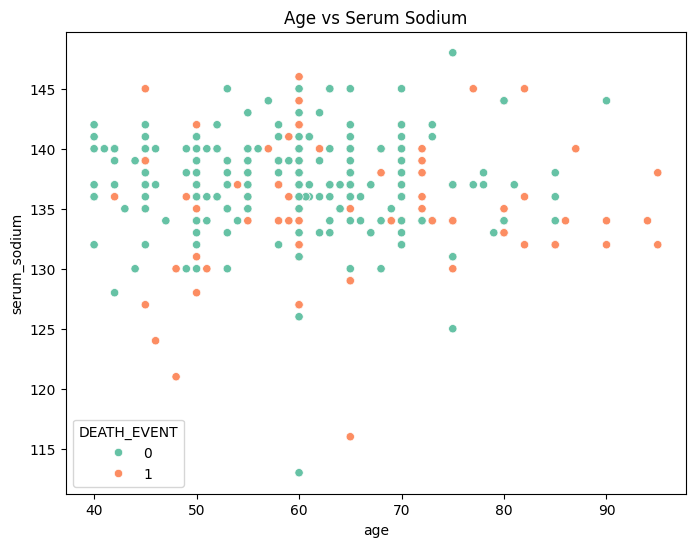

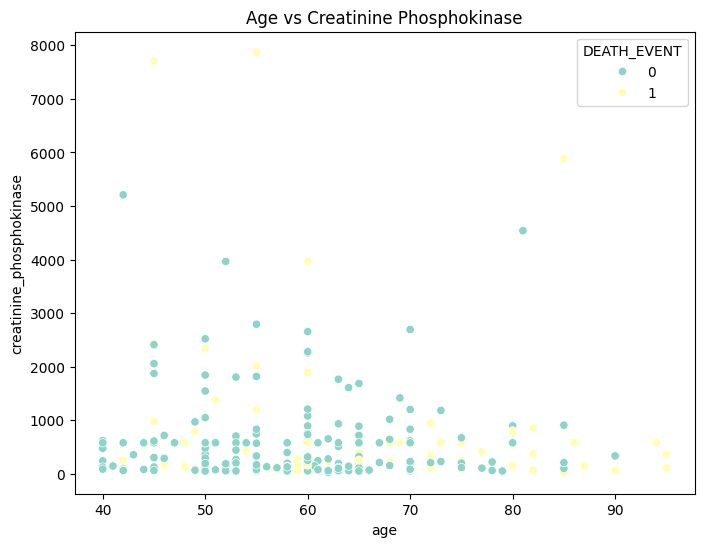

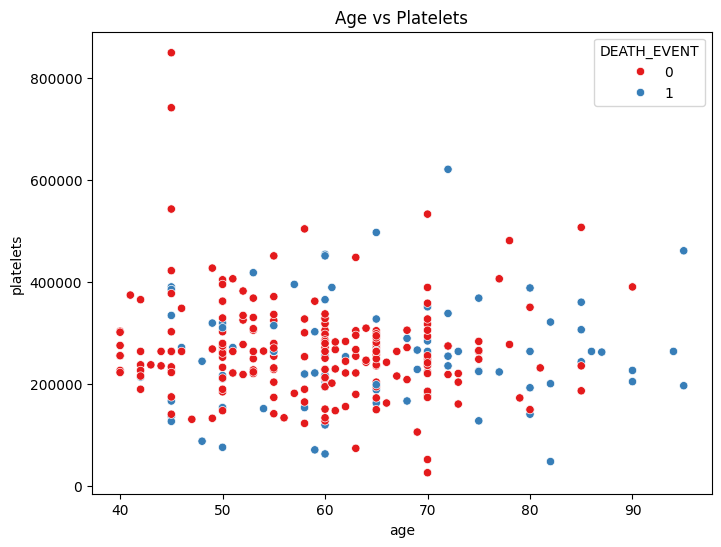

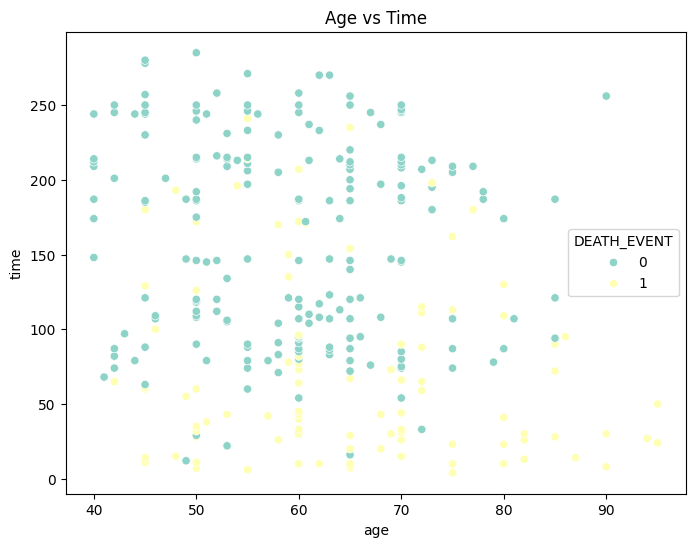

In [14]:
categorical_val = [
    ('ejection_fraction', 'Set1', "Age vs Ejection Fraction"),
    ('serum_creatinine', 'Set2', "Age vs Serum Creatinine"),
    ('serum_sodium', 'Set2', "Age vs Serum Sodium"),
    ('creatinine_phosphokinase', 'Set3', "Age vs Creatinine Phosphokinase"),
    ('platelets', 'Set1', "Age vs Platelets"),
    ('time', 'Set3', "Age vs Time")
]


for var, palette, title in categorical_val:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='age', y=var, hue='DEATH_EVENT', palette=palette)
    plt.title(title)
    plt.show()

# 3. Model Building
- Task 9: Split the dataset into features (X) and the target variable (y = DEATH_EVENT).
- Task 10: Perform train-test splitting (70% training, 30% testing) using train_test_split from sklearn.
- Task 11: Standardize the continuous features using StandardScaler.

### Task 9: Split the dataset into features (X) and the target variable (y = DEATH_EVENT).

In [15]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [25]:
X_train.shape

(209, 12)

# 4. Model Training and Evaluation
- Task 12: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- Task 13: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- Task 14: Train a Decision Tree Classifier and compare its performance with other models.

### Logistic Regression

In [26]:
lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred_lg = lg.predict(X_test_scaled)

In [28]:
y_pred_lg

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [29]:
lg.score(X_test_scaled, y_test)

0.7888888888888889

In [30]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        53
           1       0.88      0.57      0.69        37

    accuracy                           0.79        90
   macro avg       0.82      0.76      0.76        90
weighted avg       0.81      0.79      0.78        90



In [31]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_lg))

Testing Accuracy Score: 0.7888888888888889


In [32]:
print("Training Accuracy Score:", accuracy_score(y_train, lg.predict(X_train_scaled))) 

Training Accuracy Score: 0.8803827751196173


### Confusion matrix for Logistic Regression

In [33]:
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
conf_matrix_lg

array([[50,  3],
       [16, 21]], dtype=int64)

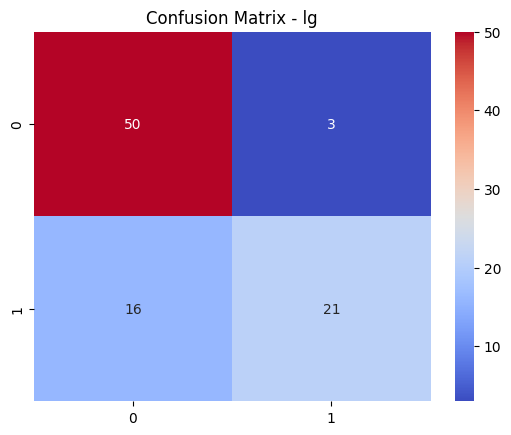

In [34]:
sns.heatmap(conf_matrix_lg, annot=True, fmt='d', cmap='coolwarm') # cmap='Purples'
plt.title('Confusion Matrix - lg')
plt.show()

### Precision

In [35]:
precision_score(y_test, y_pred_lg)

0.875

### Recall

In [36]:
recall_score(y_test, y_pred_lg)

0.5675675675675675

### f1_score

In [37]:
f1_score(y_test, y_pred_lg)

0.6885245901639344

### ROC Curve

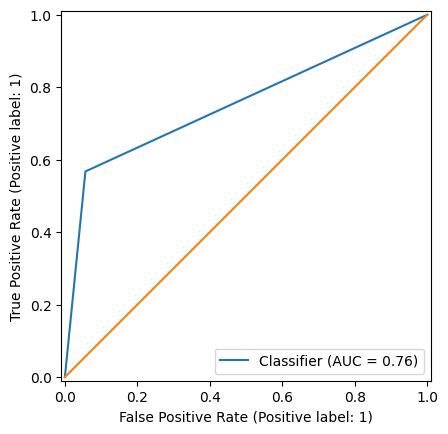

In [39]:
RocCurveDisplay.from_predictions(y_test, y_pred_lg)
plt.plot([0,1],[0,1])
plt.show()

### 1. K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

### Perform K-Fold Cross Validation

In [44]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

kfold_scores = cross_val_score(lg, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [45]:
kfold_scores

array([0.83333333, 0.76190476, 0.78571429, 0.78571429, 0.92682927])

In [46]:
kfold_scores.mean()

0.8186991869918699

In [47]:
print("K-Fold Cross Validation Scores (5 folds):", [f"{score:.2f}" for score in kfold_scores])
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.2f}")

K-Fold Cross Validation Scores (5 folds): ['0.83', '0.76', '0.79', '0.79', '0.93']
Mean K-Fold Accuracy: 0.82


### Stratified K-Fold Cross-Validation

In [51]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
strat_kfold_scores = cross_val_score(lg, X_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.80952381, 0.80952381, 0.76190476, 0.73809524, 0.87804878])

In [54]:
# Round the scores for better readability
strat_kfold_scores_rounded = [round(score, 2) for score in strat_kfold_scores]

In [55]:
print("Stratified K-Fold Cross Validation Scores (5 folds):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 folds): [0.81, 0.81, 0.76, 0.74, 0.88]
Mean Stratified K-Fold Accuracy: 0.8


# K-NN Classifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=51)
knn

KNeighborsClassifier(n_neighbors=51)

In [57]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=51)

In [58]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [59]:
knn.score(X_test_scaled, y_test)

0.6111111111111112

In [60]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        53
           1       1.00      0.05      0.10        37

    accuracy                           0.61        90
   macro avg       0.80      0.53      0.43        90
weighted avg       0.77      0.61      0.48        90



In [61]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Testing Accuracy Score: 0.6111111111111112


In [62]:
print("Training Accuracy Score:", accuracy_score(y_train, knn.predict(X_train_scaled)))

Training Accuracy Score: 0.722488038277512


### Confusion matrix for KNN

In [63]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[53,  0],
       [35,  2]], dtype=int64)

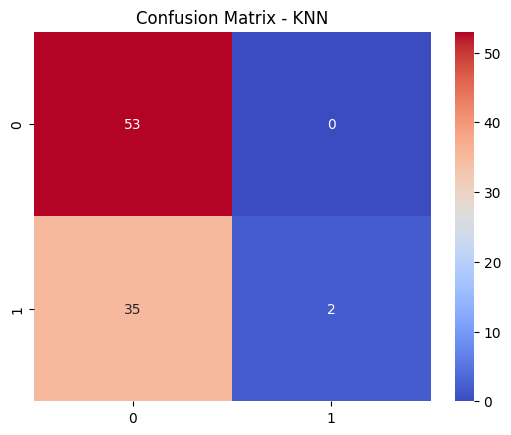

In [64]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm') # cmap='Purples'
plt.title('Confusion Matrix - KNN')
plt.show()

### Precision

In [65]:
precision_score(y_test, y_pred_knn)

1.0

### Recall

In [66]:
recall_score(y_test, y_pred_knn)

0.05405405405405406

### f1_score

In [67]:
f1_score(y_test, y_pred_knn)

0.10256410256410256

### ROC Curve

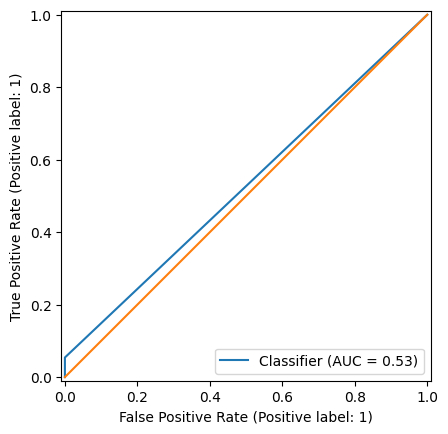

In [68]:
RocCurveDisplay.from_predictions(y_test, y_pred_knn)
plt.plot([0,1],[0,1])
plt.show()

### 1. K-Fold Cross Validation

In [69]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)

### Perform K-Fold Cross Validation

In [71]:
kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [72]:
kfold_scores

array([0.78571429, 0.76190476, 0.76190476, 0.66666667, 0.85365854])

In [73]:
kfold_scores.mean()

0.7659698025551683

In [74]:
print("K-Fold Cross Validation Scores (5 folds):", [f"{score:.2f}" for score in kfold_scores])
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.2f}")

K-Fold Cross Validation Scores (5 folds): ['0.79', '0.76', '0.76', '0.67', '0.85']
Mean K-Fold Accuracy: 0.77


### StratifiedKFold Cross Validation

In [75]:
from sklearn.model_selection import StratifiedKFold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
strat_kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.71428571, 0.71428571, 0.69047619, 0.83333333, 0.80487805])

In [77]:
print("Stratified K-Fold Cross Validation Scores (5 folds):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 folds): [0.81, 0.81, 0.76, 0.74, 0.88]
Mean Stratified K-Fold Accuracy: 0.75


# Decision Tree Classifier

In [78]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

### Train the model

In [80]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### Make predictions

In [82]:
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [83]:
dt.score(X_test_scaled, y_test)

0.6666666666666666

### Evaluate the model

In [84]:
print("Decission tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decission tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



### Train Accuracy

In [87]:
print("Training Accuracy Score:", accuracy_score(y_train, dt.predict(X_train_scaled)))

Training Accuracy Score: 1.0


### Testing Accuracy

In [88]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Testing Accuracy Score: 0.6666666666666666


### Confusion matrix for KNN

In [89]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt

array([[42, 11],
       [19, 18]], dtype=int64)

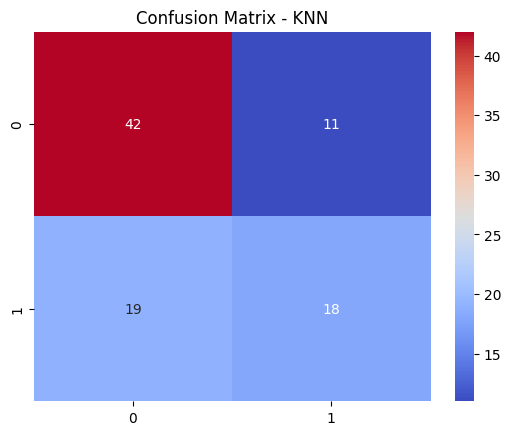

In [90]:
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='coolwarm') # cmap='Purples'
plt.title('Confusion Matrix - KNN')
plt.show()

### Precision

In [91]:
precision_score(y_test, y_pred_dt)

0.6206896551724138

### Recall

In [92]:
recall_score(y_test, y_pred_dt)

0.4864864864864865

### f1_score

In [93]:
f1_score(y_test, y_pred_dt)

0.5454545454545454

### ROC Curve

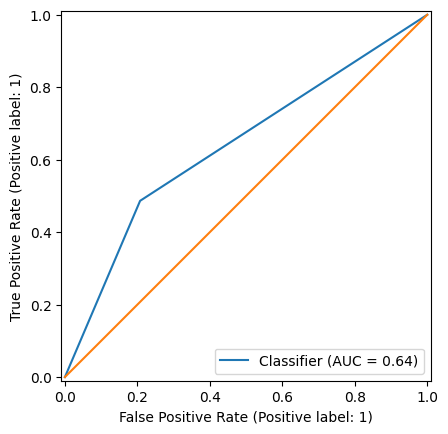

In [94]:
RocCurveDisplay.from_predictions(y_test, y_pred_dt)
plt.plot([0,1],[0,1])
plt.show()

### 1. K-Fold Cross Validation

In [95]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [96]:
kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [97]:
kfold_scores

array([0.78571429, 0.76190476, 0.76190476, 0.66666667, 0.85365854])

In [98]:
kfold_scores.mean()

0.7659698025551683

In [99]:
print("K-Fold Cross Validation Scores (5 folds):", [f"{score:.2f}" for score in kfold_scores])
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.2f}")

K-Fold Cross Validation Scores (5 folds): ['0.79', '0.76', '0.76', '0.67', '0.85']
Mean K-Fold Accuracy: 0.77


### StratifiedKFold Cross Validation

In [100]:
from sklearn.model_selection import StratifiedKFold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [101]:
strat_kfold_scores = cross_val_score(dt, X_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.76190476, 0.76190476, 0.83333333, 0.83333333, 0.75609756])

In [102]:
print("Stratified K-Fold Cross Validation Scores (5 folds):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 folds): [0.81, 0.81, 0.76, 0.74, 0.88]
Mean Stratified K-Fold Accuracy: 0.79
